# Run full dataset

##Preparation Imports

In [ ]:
# imports for settings
import os
from google.colab import drive
from importlib import reload

##Installations

###SPIT code

In [ ]:
!git clone https://github.com/pypeit/spit.git

Cloning into 'spit'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 884 (delta 9), reused 2 (delta 0), pack-reused 860
Receiving objects: 100% (884/884), 1.18 MiB | 1.30 MiB/s, done.
Resolving deltas: 100% (507/507), done.


In [ ]:
%cd spit

/content/spit


In [ ]:
!git checkout x_fussing

Branch 'x_fussing' set up to track remote branch 'x_fussing' from 'origin'.
Switched to a new branch 'x_fussing'


In [ ]:
!git pull

Already up to date.


In [ ]:
!python setup.py install
!python setup.py develop

running install
running bdist_egg
running egg_info
creating spit.egg-info
writing spit.egg-info/PKG-INFO
writing dependency_links to spit.egg-info/dependency_links.txt
writing top-level names to spit.egg-info/top_level.txt
writing manifest file 'spit.egg-info/SOURCES.txt'
writing manifest file 'spit.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/spit
copying spit/utils.py -> build/lib/spit
copying spit/io.py -> build/lib/spit
copying spit/generate_pngs.py -> build/lib/spit
copying spit/setup_package.py -> build/lib/spit
copying spit/labels.py -> build/lib/spit
copying spit/training.py -> build/lib/spit
copying spit/image_loader.py -> build/lib/spit
copying spit/ginga.py -> build/lib/spit
copying spit/train.py -> build/lib/spit
copying spit/test.py -> build/lib/spit
copying spit/defs.py -> build/lib/spit
copying spit/images.py -> build/lib/spit
copying spit/classify.p

###Google Drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/model_test/"
spit_path = "/content/drive/My Drive"
os.environ['SPIT_DATA'] = "/content/drive/My Drive/Kast/PNG"

##Imports from SPIT

In [ ]:
import numpy as np
from spit import preprocess
from spit import labels
from spit import classifier
from spit import image_loader
from spit import utils
import tensorflow as tf
from tensorflow import keras

##Start full run

###Preloads

In [ ]:
label_dict = labels.kast_label_dict() 
label_dict

OrderedDict([('bias_label', 0),
             ('science_label', 1),
             ('standard_label', 2),
             ('arc_label', 3),
             ('flat_label', 4)])

In [ ]:
preproc_dict = preprocess.original_preproc_dict()
preproc_dict

{'cutoff_percent': 1.1,
 'image_height': 210,
 'image_width': 650,
 'img_shape': (210, 650),
 'img_size_flat': 136500,
 'num_channels': 1,
 'pad_const': 0}

In [ ]:
classify_dict = labels.kast_classify_dict(label_dict)
classify_dict

{-1: 'unknown', 0: 'bias', 1: 'science', 2: 'standard', 3: 'arc', 4: 'flat'}

###Load Set of Images

In [ ]:
#reload(image_loader)
#train_images, train_labels = image_loader.load_linear_pngs('Kast', 'train', label_dict, subset=100,
                                                           #spit_path = spit_path, images_only = True)

In [ ]:
#reload(image_loader)
#valid_images, valid_labels = image_loader.load_linear_pngs('Kast', 'validation', label_dict, subset=20,
                                                          #spit_path=spit_path, images_only=True)

In [ ]:
train = np.load(os.path.join(spit_path, 'Kast', 'kast_train.npz'))

In [ ]:
train_images = train['images']
train_labels = train['labels']

In [ ]:
train_images.shape

(15540, 210, 650, 1)

In [ ]:
validate = np.load(os.path.join(spit_path, 'Kast', 'kast_validate.npz'))

In [ ]:
valid_images = validate['images']
valid_labels = validate['labels']

###Load Classifier and Train

In [ ]:
reload(classifier)
kast = classifier.Classifier(label_dict, preproc_dict, classify_dict) 

W0730 19:13:49.656604 140711309490048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=len(label_dict))
valid_labels = keras.utils.to_categorical(valid_labels, num_classes=len(label_dict))

In [ ]:
checkpoint=keras.callbacks.ModelCheckpoint(file_path+'best_model.h5', monitor='val_acc', save_best_only=True, mode='max')

In [ ]:
result = kast.model.fit(train_images, train_labels, epochs=100, batch_size=128, 
                   validation_data=(valid_images, valid_labels), callbacks=[checkpoint]) 

Train on 15540 samples, validate on 3880 samples
Epoch 1/100
15540/15540 [==============================] - 97s 6ms/sample - loss: 131.6666 - acc: 0.8916 - val_loss: 0.1750 - val_acc: 0.9776
Epoch 2/100
15540/15540 [==============================] - 83s 5ms/sample - loss: 0.0743 - acc: 0.9921 - val_loss: 0.2487 - val_acc: 0.9778
Epoch 3/100
15540/15540 [==============================] - 79s 5ms/sample - loss: 0.0812 - acc: 0.9914 - val_loss: 0.8436 - val_acc: 0.9742
Epoch 4/100
15540/15540 [==============================] - 82s 5ms/sample - loss: 0.0514 - acc: 0.9959 - val_loss: 0.2355 - val_acc: 0.9843
Epoch 5/100
15540/15540 [==============================] - 79s 5ms/sample - loss: 0.0184 - acc: 0.9974 - val_loss: 1.0360 - val_acc: 0.9835
Epoch 6/100
15540/15540 [==============================] - 79s 5ms/sample - loss: 0.0564 - acc: 0.9929 - val_loss: 1.0404 - val_acc: 0.9704
Epoch 7/100
15540/15540 [==============================] - 79s 5ms/sample - loss: 0.2037 - acc: 0.9719 - val_

###Test

In [ ]:
test = np.load(os.path.join(spit_path, 'Kast', 'kast_test.npz'))

In [ ]:
test_images = test['images']
test_labels = test['labels']

In [ ]:
test_labels = keras.utils.to_categorical(test_labels, num_classes=len(label_dict))

In [ ]:
kast.model.evaluate(test_images, test_labels) 

4840/4840 [==============================] - 9s 2ms/sample - loss: 6.0781 - acc: 0.9667


[6.078056853387143, 0.96673554]

###Plot and Save

In [ ]:
result.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
train_acc = result.history['acc']
valid_acc = result.history['val_acc']
train_loss = result.history['loss']
valid_acc = result.history['val_loss']

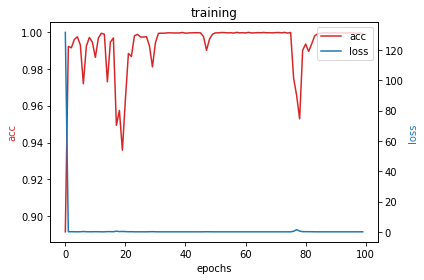

In [ ]:
reload(utils)
utils.display_training_trends(result, 'acc', 'loss')

In [ ]:
utils.display_training_trends(result, 'acc', 'val_acc')

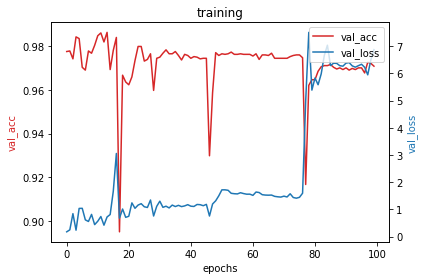

In [ ]:
utils.display_training_trends(result, 'val_acc', 'val_loss')

###Load Best and Test

In [ ]:
file_path = '/content/drive/My Drive/model_test/'

In [ ]:
best_load = classifier.Classifier(label_dict, preproc_dict, classify_dict)
best_load.model = best_load.load_model('kast_keras_best_model.h5', file_path)

W0812 16:42:22.528753 139750259435392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0812 16:42:24.318374 139750259435392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0812 16:42:24.320800 139750259435392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

In [ ]:
best_load.model.evaluate(test_images, test_labels)

4840/4840 [==============================] - 18s 4ms/sample - loss: 0.8795 - acc: 0.9857


[0.879465754879546, 0.9857438]

In [ ]:
best_load.model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 206, 646, 36)      936       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 103, 323, 36)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 99, 319, 64)       57664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 159, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 498624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               63824000  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [ ]:
predictions = best_load.model.predict(test_images)
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       ...,
       [2.1291440e-34, 1.0000000e+00, 7.8258592e-16, 1.5911061e-27,
        7.2372366e-32],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [ ]:
val_true = test['labels']

In [ ]:
pred = []
for p in enumerate(predictions):
  # index of loop
  i = p[0]
  # particular prediction array for this image
  p_array = p[1]
  # find and append prediction
  maxIndex = np.where(p_array == np.amax(p_array))
  pred.append(maxIndex[0][0])

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
# plot_confusion_matrix(test_labels, pred, )
print(label_dict)
classes = []
for label in label_dict:
  if '_label' in label:
    label = label.replace('_label','')
  classes.append(label)
print(classes)
# classes = {x.replace('_label', '') for x in classes}
# print(classes)

OrderedDict([('bias_label', 0), ('science_label', 1), ('standard_label', 2), ('arc_label', 3), ('flat_label', 4)])
['bias', 'science', 'standard', 'arc', 'flat']


Confusion matrix, without normalization
[[966   2   0   0   0]
 [  0 949  19   0   0]
 [  0  39 929   0   0]
 [  0   6   0 962   0]
 [  0   0   3   0 965]]


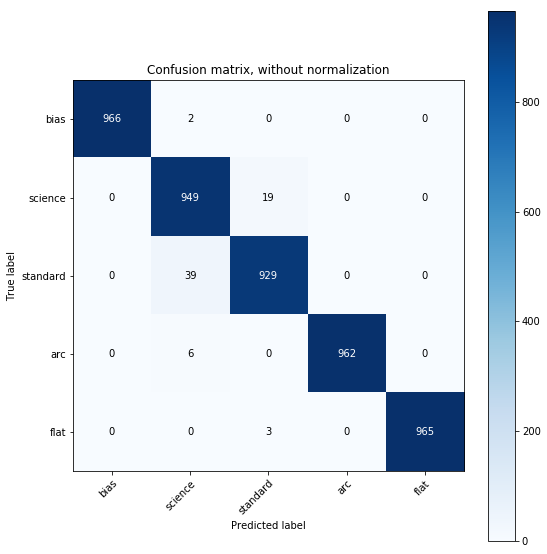

In [ ]:
plot_confusion_matrix(val_true, pred, classes)